##Data

In [16]:
!pip install stable_baselines3

In [17]:
import pandas as pd
from stable_baselines3 import PPO

In [18]:
data = pd.read_csv("aapl_data.csv")
data.head()

,Field,Date,FIBBG000B9XRY4
0,Close,2023-01-03,124.2163
1,Close,2023-01-04,125.4975
2,Close,2023-01-05,124.1666
3,Close,2023-01-06,128.7352
4,Close,2023-01-09,129.2616


In [19]:
# Define the new column names
new_column_names = {'Field': 'Field',
                    'Date': 'Date',
                    'FIBBG000B9XRY4': 'Price'}

# Rename the columns
data = data.rename(columns=new_column_names)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
data = pd.DataFrame(data)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Field,Date,Price
0,Close,2023-01-03,124.2163
1,Close,2023-01-04,125.4975
2,Close,2023-01-05,124.1666
3,Close,2023-01-06,128.7352
4,Close,2023-01-09,129.2616
...,...,...,...
245,Close,2023-12-22,193.3533
246,Close,2023-12-26,192.8040
247,Close,2023-12-27,192.9038
248,Close,2023-12-28,193.3333


##PLot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


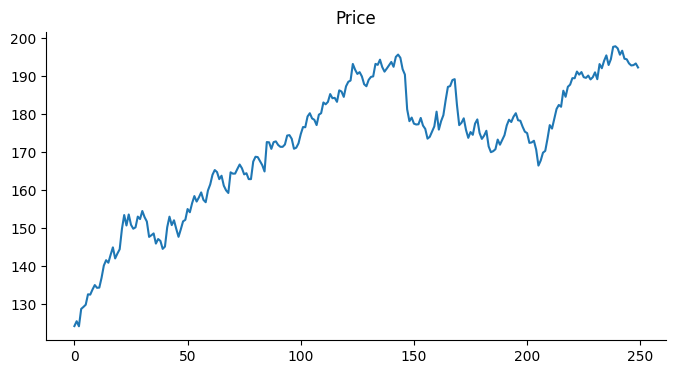

In [21]:
# @title Price

from matplotlib import pyplot as plt
data['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


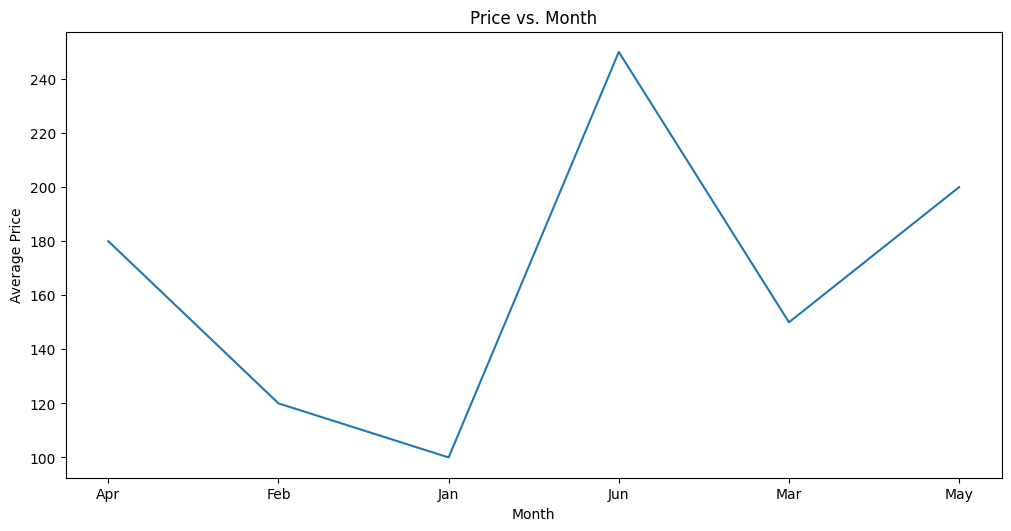

In [22]:
# @title Month vs Price

import matplotlib.pyplot as plt
import seaborn as sns

# Create some example data
d = {'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
       'price': [100, 120, 150, 180, 200, 250]}

df = pd.DataFrame(d)

# Group the data by month
grouped_data = df.groupby('month')['price'].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
grouped_data.plot(kind='line', ax=ax)

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Average Price')
ax.set_title('Price vs. Month')

# Show the plot
plt.show()

#NEW

In [23]:
import numpy as np

class QLearningAgent:
    def __init__(self, n_states, n_actions, learning_rate=0.1, discount_factor=0.9, epsilon=0.01):
        self.q_table = np.zeros((n_states, n_actions))
        self.transition_counts = np.zeros((n_states, n_states))  # Transition counts between states
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.prev_state = None
        self.prev_action = None

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(len(self.q_table[state]))
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        if self.prev_state is not None and self.prev_action is not None:
            old_value = self.q_table[self.prev_state, self.prev_action]
            next_max = np.max(self.q_table[next_state])
            new_value = old_value + self.learning_rate * (reward + self.discount_factor * next_max - old_value)
            self.q_table[self.prev_state, self.prev_action] = new_value

            # Update transition counts
            self.transition_counts[self.prev_state, next_state] += 1

        self.prev_state = state
        self.prev_action = action

    def get_transition_probabilities(self):
      # Calculate transition probabilities from transition counts
      transition_counts_sum = np.sum(self.transition_counts, axis=1, keepdims=True)
      transition_probabilities = np.divide(self.transition_counts, transition_counts_sum,
                                          out=np.zeros_like(self.transition_counts),
                                          where=transition_counts_sum != 0)
      return transition_probabilities

    def reset(self):
        self.prev_state = None
        self.prev_action = None

def calculate_state(returns):
    if returns >= 0.1:
        return 2  # Bull state
    elif returns > -0.1:
        return 1  # Flat state
    else:
        return 0  # Bear state

def preprocess_data(data):
  # Assuming 'Field' and 'Date' are not relevant for modeling, we'll drop them
  processed_data = data.drop(['Field', 'Date'], axis=1)
  return processed_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
def main(data, agent):
    portfolio_value = 0

    for i in range(len(processed_data)-2):
        current_price = processed_data.iloc[i]['Price']
        next_price = processed_data.iloc[i + 1]['Price']
        returns = (next_price - current_price) / current_price
        state = calculate_state(returns)
        action = agent.select_action(state)

        # Calculate transition probabilities and make decision based on likelihood
        transition_probabilities = agent.get_transition_probabilities()
        #print(transition_probabilities)
        bull_transition_likelihood = transition_probabilities[state, 2]
        bear_transition_likelihood = transition_probabilities[state, 0]
        if bull_transition_likelihood > bear_transition_likelihood:
            # Buy the next day
            portfolio_value += 1
        elif bear_transition_likelihood > bull_transition_likelihood:
            # Sell the next day
            portfolio_value -= 1

        # Update Q-table
        next_price_next = processed_data.iloc[i + 2]['Price']
        next_returns = (next_price_next - next_price) / next_price
        next_state = calculate_state(next_returns)
        reward = 1 if action == 1 and next_state == 2 else -1 if action == 2 and next_state == 0 else 0
        agent.update_q_table(state, action, reward, next_state)

    return portfolio_value

In [28]:
processed_data = preprocess_data(data)
n_states = 3  # Number of states (Bull, Flat, Bear)
n_actions = 3  # Number of actions (Hold, Buy, Sell)
agent = QLearningAgent(n_states, n_actions)
portfolio_value = main(processed_data, agent)

# Print the final portfolio value
print("Portfolio Value:", portfolio_value)

Portfolio Value: 0


#Dynamic Problem

In [29]:
import numpy as np

def calculate_state(returns):
    if returns >= 0.1:
        return 2  # Bull state
    elif returns > -0.1:
        return 1  # Flat state
    else:
        return 0  # Bear state

def dynamic_programming(data):
    n_days = len(data)
    n_states = 3  # Number of states (Bull, Flat, Bear)

    # Initialize arrays to store optimal values and actions
    optimal_values = np.zeros((n_days, n_states))
    optimal_actions = np.zeros((n_days, n_states), dtype=int)

    # Calculate transition probabilities (assuming stationary)
    transition_counts = np.zeros((n_states, n_states))
    for i in range(n_days - 2):
        current_price = data.iloc[i]['Price']
        next_price = data.iloc[i + 1]['Price']
        returns = (next_price - current_price) / current_price
        current_state = calculate_state(returns)

        next_price_next = data.iloc[i + 2]['Price']
        next_returns = (next_price_next - next_price) / next_price
        next_state = calculate_state(next_returns)

        transition_counts[current_state, next_state] += 1

    # Calculate transition probabilities from transition counts
    transition_counts_sum = np.sum(transition_counts, axis=1, keepdims=True)
    transition_probabilities = np.divide(transition_counts, transition_counts_sum,out=np.zeros_like(transition_counts),where=transition_counts_sum != 0)

    # Initialize optimal values for the last day
    last_day_price = data.iloc[-1]['Price']
    last_day_returns = (last_day_price - data.iloc[-2]['Price']) / data.iloc[-2]['Price']
    last_day_state = calculate_state(last_day_returns)
    optimal_values[-1] = [0, 0, 1]  # If the last day is Bull, buy; otherwise, hold

    # Iterate backward over days
    for i in range(n_days - 2, -1, -1):
        current_price = data.iloc[i]['Price']
        current_returns = (current_price - data.iloc[i - 1]['Price']) / data.iloc[i - 1]['Price']
        current_state = calculate_state(current_returns)

        # Iterate over possible states
        for j in range(n_states):
            if j == 0:  # Bear state
                reward = 0
            elif j == 2:  # Bull state
                reward = 1
            else:  # Flat state
                reward = optimal_values[i + 1, j]

            # Calculate expected value for each action
            expected_values = np.zeros(2)
            for k in range(2):
                action = k  # 0: Hold, 1: Buy
                expected_value = reward
                for l in range(n_states):
                    expected_value += transition_probabilities[j, l] * optimal_values[i + 1, l] * action
                expected_values[k] = expected_value

            # Select action with maximum expected value
            optimal_values[i, j] = np.max(expected_values)
            optimal_actions[i, j] = np.argmax(expected_values)

    return optimal_values, optimal_actions

def backtrace_actions(optimal_actions):
    actions = []
    state = 0  # Start in the Bear state
    for action in optimal_actions:
        actions.append(action[state])
        state = action[state]
    return actions

# Example usage:
optimal_values, optimal_actions = dynamic_programming(processed_data)
actions = backtrace_actions(optimal_actions)
portfolio_value = sum(actions)
print("Portfolio Value:", portfolio_value)

Portfolio Value: 0
